# Import Library

In [292]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
# models used
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# data visualization library 
import matplotlib.pyplot as plt
import seaborn as sns


# Data Analysis

In [236]:
# reading data from csv file 
df=pd.read_csv('Covid Dataset.csv')
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [238]:
df.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [239]:
columns=df.columns
columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [240]:
df['COVID-19'].value_counts()

Yes    4383
No     1051
Name: COVID-19, dtype: int64

# Finding Missing Values


In [241]:
# create a table with data missing 
missing_counts=df.isnull().sum() # missing values

missing_percent = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_counts': missing_counts,
    'missing_percent %': missing_percent 
}
frame=pd.DataFrame(value)
frame

,missing_counts,missing_percent %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


# Data Vizualisation

### Bar Plots

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

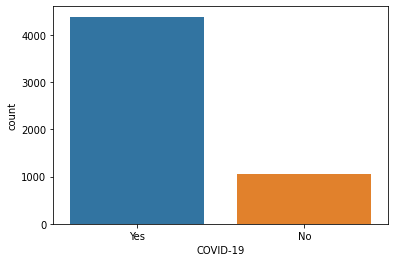

In [242]:
sns.countplot(x='COVID-19',data=df)

## Pie Charts

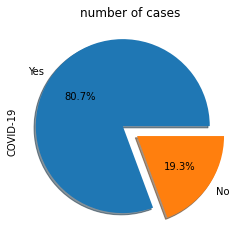

In [243]:
df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

## Histogram

### Breathing Problem

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

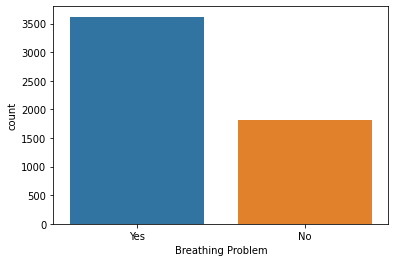

In [244]:
sns.countplot(x='Breathing Problem',data=df)

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

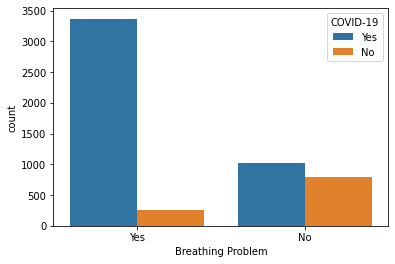

In [245]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=df)

### Fever

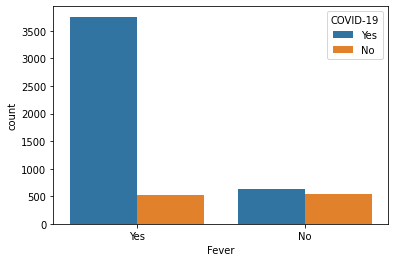

In [246]:
sns.countplot(x='Fever',hue='COVID-19',data=df);

### Dry Cough

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

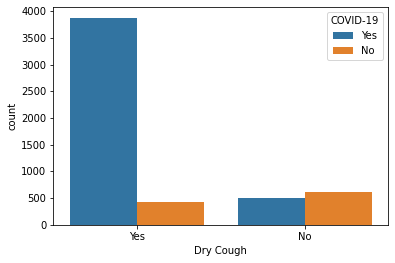

In [247]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=df)

### Sore throat

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

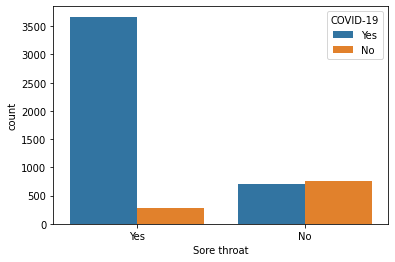

In [248]:
sns.countplot(x='Sore throat',hue='COVID-19',data=df)

# Feature Transformation

In [249]:

# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
for col in columns:  
# Encode labels in columns .
    df[col]= label_encoder.fit_transform(df[col])
df.head()  

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


# Info About Data After Transformation

In [250]:
df.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


array([[<AxesSubplot:title={'center':'Breathing Problem'}>,
        <AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Dry Cough'}>,
        <AxesSubplot:title={'center':'Sore throat'}>,
        <AxesSubplot:title={'center':'Running Nose'}>],
       [<AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Chronic Lung Disease'}>,
        <AxesSubplot:title={'center':'Headache'}>,
        <AxesSubplot:title={'center':'Heart Disease'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Hyper Tension'}>,
        <AxesSubplot:title={'center':'Fatigue '}>,
        <AxesSubplot:title={'center':'Gastrointestinal '}>,
        <AxesSubplot:title={'center':'Abroad travel'}>,
        <AxesSubplot:title={'center':'Contact with COVID Patient'}>],
       [<AxesSubplot:title={'center':'Attended Large Gathering'}>,
        <AxesSubplot:title={'center':'Visited Public Exposed Places'}>,
        <AxesSubplot:title=

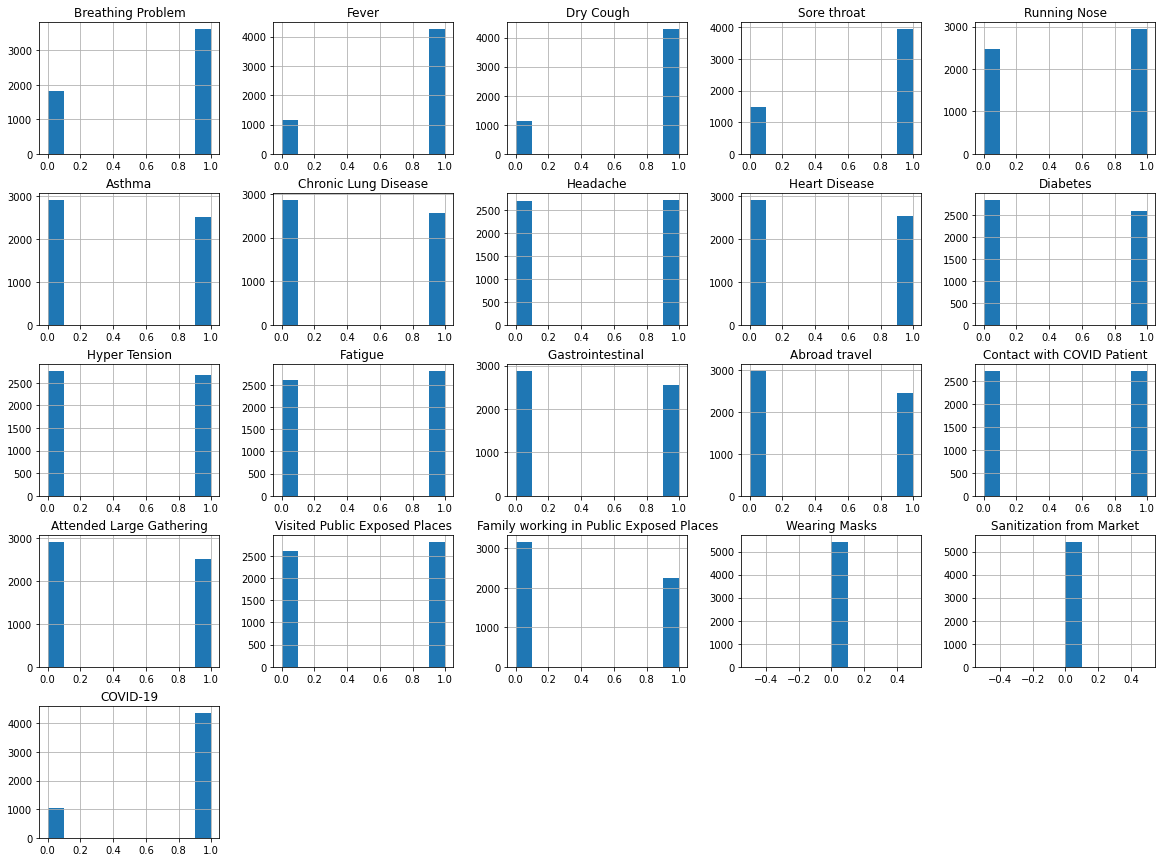

In [251]:
df.hist(figsize=(20,15))

# Features Selection

In [252]:
# split the label from the features 
# we found that 'Wearing Masks','Sanitization from Market' have one label so they are not important
df=df.drop(['Wearing Masks','Sanitization from Market'], axis=1)
x=df.drop('COVID-19',axis=1)
y=df['COVID-19']
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


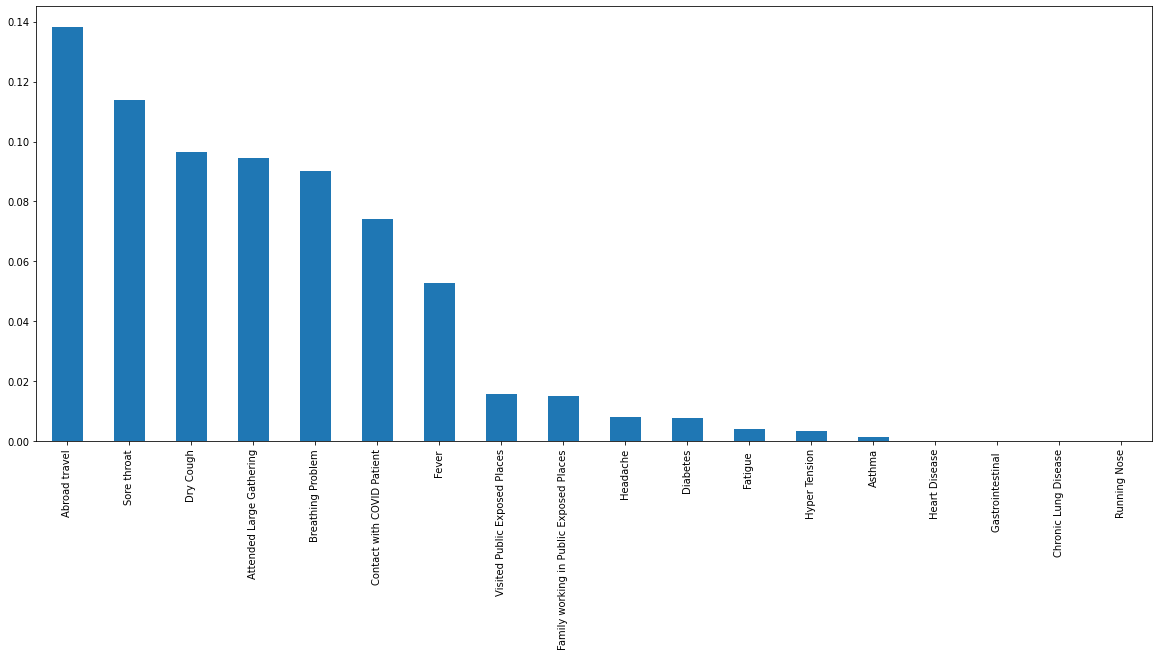

In [253]:
# determine the mutual information
mutual_info = mutual_info_classif(x, y,random_state=30)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
# sort values descending
mutual_info=mutual_info.sort_values(ascending=False)
#let's plot the ordered mutual_info values per feature
mutual_info.plot.bar(figsize=(20, 8))
# get features' names of the max 14 ones
features_selected=(mutual_info[:14]).index
# drop any other feature from our dataset
x = x.drop(x.columns.difference(features_selected), axis=1)


# Split Dataset

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=30)

,Breathing Problem,Fever,Dry Cough,Sore throat,Asthma,Headache,Diabetes,Hyper Tension,Fatigue,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places
2134,0,1,1,1,0,0,0,0,1,1,1,0,1,1
1810,1,1,1,1,1,1,0,1,1,0,1,0,0,0
1732,1,1,1,1,1,1,1,0,1,1,1,0,0,1
3752,0,1,1,1,0,1,0,1,0,1,1,1,1,0
3874,1,0,1,0,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,1,1,1,1,1,1,0,1,1,1,1,0,1,0
5260,0,1,1,0,0,1,1,1,1,0,1,1,1,0
500,1,1,1,1,0,0,0,0,1,1,1,1,1,0
3885,1,0,1,1,0,1,0,1,1,1,0,1,1,0


## KNN Model

In [255]:
knn = KNeighborsClassifier()
k_range = list(range(1, 30))
weight_options = ['uniform', 'distance']
leaf_options=list(range(1,10))
p_options=[1,2]

param_grid = dict(n_neighbors=k_range,weights=weight_options,leaf_size=leaf_options,p=p_options)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 5 folds for each of 1044 candidates, totalling 5220 fits
{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Accuracy for our training dataset with tuning is : 98.02%


In [260]:
knn = KNeighborsClassifier(n_neighbors=2,leaf_size=1,weights='distance',p=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Score//Accuracy
acc_knn=knn.score(x_test, y_test)*100
print("Accuracy for KNN on CV data: ",acc_knn)

Accuracy for KNN on CV data:  97.88408463661453


## SVM Model

In [262]:
svc=SVC()
param_grid = {'C': [0.1,1,5, 10,20,30,40,50, 100,150], 'gamma': [10,1,0.1,0.01,0.001],
'kernel': ['rbf', 'poly', 'sigmoid','linear']}
grid = GridSearchCV(svc,param_grid,verbose=1,cv=5,scoring='accuracy')
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy for our training dataset with tuning is : 98.04%


In [264]:
svc = SVC(kernel='rbf',C=10,gamma=0.1) # Linear Kernel
#Train the model using the training sets
svc.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = svc.predict(x_test)
#Score/Accuracy
acc_svc=svc.score(x_test, y_test)*100
print("Accuracy for SVM on CV data: ",acc_svc)

Accuracy for SVM on CV data:  98.71205151793929


# RandomForest Model

In [266]:
rfc=RandomForestClassifier(random_state=40)
# defining paramteres ranges
n_estimators = [10,20,30,40,50,60,70,80,110,130,150,200]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7,8,9,10,11,12,15,20]
# Method of selecting samples for training each tree
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion' :['gini', 'entropy']
               }
# fit gridsearch and print the best parameters
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,verbose=1,scoring='accuracy')
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)
accuracy = CV_rfc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 5 folds for each of 624 candidates, totalling 3120 fits
{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 40}
Accuracy for our training dataset with tuning is : 98.09%


In [267]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth=9, max_features= 'auto', n_estimators= 40,random_state=1024) 
#Train the model using the training sets
rfc.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = rfc.predict(x_test)
#Score/Accuracy
acc_rfc=rfc.score(x_test, y_test)*100
print("Accuracy for Random Forest on CV data: ",acc_rfc)


Accuracy for Random Forest on CV data:  98.71205151793929


# DecisionTree model

In [268]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [10,1,0.1, .01, .001,0.0001,0.00001],
              'max_depth' :np.arange(2,20,1),
              'criterion' :['gini', 'entropy']
              }
tree_clas = DecisionTreeClassifier(random_state=40)
CV_dtc = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=1,scoring='accuracy')
CV_dtc.fit(x_train, y_train)
print(CV_dtc.best_params_)
accuracy = CV_dtc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 5 folds for each of 756 candidates, totalling 3780 fits
{'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}
Accuracy for our training dataset with tuning is : 97.98%


In [269]:
dtc = DecisionTreeClassifier(max_depth=11, max_features= 'auto',ccp_alpha= 0.0001, criterion= 'gini',random_state=40) 
#Train the model using the training sets
dtc.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = dtc.predict(x_test)
#Score/Accuracy
acc_dtc=dtc.score(x_test, y_test)*100
print("Accuracy for Decision Tree on CV data: ",acc_dtc)

Accuracy for Decision Tree on CV data:  98.5280588776449


# Naive Bayes model

In [270]:
model = GaussianNB()
model.fit(x_train,y_train)
#Score/Accuracy
acc_gaussian= model.score(x_test, y_test)*100

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(x_train, y_train);
print(gs_NB.best_params_)
accuracy = gs_NB.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.657933224657568}
Accuracy for our training dataset with tuning is : 96.50%


In [290]:
bayes = GaussianNB(var_smoothing=0.657933224657568) 
#Train the model using the training sets
bayes.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = bayes.predict(x_test)
#Score/Accuracy
acc_bayes=bayes.score(x_test, y_test)*100
print("Accuracy for Decision Tree on CV data: ",acc_bayes)

Accuracy for Decision Tree on CV data:  97.148114075437


# Logistic Regression

In [294]:
warnings.filterwarnings('ignore')
C = [0,0.1,1,5,10,25]
penalty = ['l1', 'l2','elasticnet', 'none']
max_iter = [20, 50,100,1000]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['auto', 'ovr', 'multinomial']
hyperparameters = dict(C=C, penalty=penalty,max_iter=max_iter,solver=solver,multi_class=multi_class)
logistic = LogisticRegression(random_state=80)
gridsearch = GridSearchCV(logistic, hyperparameters,scoring="accuracy",cv=5,verbose=1)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)
accuracy = gridsearch.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
{'C': 0, 'max_iter': 20, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'sag'}
Accuracy for our training dataset with tuning is : 96.66%


In [300]:
logistic = LogisticRegression( C=0,max_iter=20, penalty='none', random_state=40,
                   solver='sag',multi_class= 'multinomial')
logistic = logistic.fit(x_train, y_train)

y_pred = logistic.predict(x_test)
acc_log=logistic.score(x_test, y_test)*100
print("Accuracy for Decision Tree on CV data: ",acc_log)

Accuracy for Decision Tree on CV data:  98.06807727690892


# Final Accuracy

In [301]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',   
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_rfc, acc_bayes, acc_dtc
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,98.712052
3,Random Forest,98.712052
5,Decision Tree,98.528059
2,Logistic Regression,98.068077
1,KNN,97.884085
4,Naive Bayes,97.148114
